In [7]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train_df = pd.read_csv('./new_train.csv')
train_df = train_df.select_dtypes(['number'])
train_df = train_df.fillna(train_df.mean())
test_df = pd.read_csv('./new_test.csv')
test_df = test_df.select_dtypes(['number'])
test_df = test_df.fillna(test_df.mean())
test_df.head()
print(train_df.isnull().sum())

# Find missing values
for i, r in train_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


for i, r in test_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


[117121.01720767 152637.97807838 172989.7613465  199937.39413669
 195180.58103456 182384.28836171 199534.00561182 171594.65702331
 207578.28273731 113690.89640359]
Accuracy (R^2): 0.7678387324460562


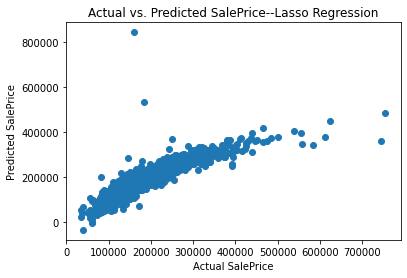

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

# Create Lasso Regression model
lasso_regr = Lasso(alpha=1.0)  # You can specify the alpha value for Lasso regularization

# Prepare the training data
x_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df[['SalePrice']]

# Fit Lasso Regression model to training data
lasso_regr.fit(x_train, y_train)

# Make predictions on test data
predictions = lasso_regr.predict(test_df)

# Print first ten predictions
print(predictions[0:10])

# Perform 6-fold cross-validation
scores = cross_val_score(lasso_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)

# Make cross-validated predictions
predictions = cross_val_predict(lasso_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)

# Plot actual vs. predicted sale prices
plt.scatter(train_df[['SalePrice']], predictions)
plt.title("Actual vs. Predicted SalePrice--Lasso Regression")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")

# Get accuracy of model from cross-validation
accuracy = metrics.r2_score(train_df[['SalePrice']], predictions)
print("Accuracy (R^2):", accuracy)


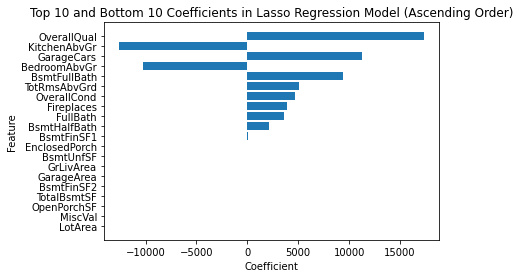

[117121.01720767 152637.97807838 172989.7613465  199937.39413669
 195180.58103456 182384.28836171 199534.00561182 171594.65702331
 207578.28273731 113690.89640359]


In [9]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Create Lasso Regression model
lasso_regr = Lasso(alpha=1.0)  # You can specify the alpha value (regularization strength) and other parameters

# Prepare the training data
x_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df[['SalePrice']]

# Fit Lasso Regression model to training data
lasso_regr.fit(x_train, y_train)

# Get coefficients
coefficients = lasso_regr.coef_
feature_names = x_train.columns

# Set weights of irrelevant features to zero
coefficients[coefficients == 0] = np.nan

# Sort coefficients by magnitude in ascending order
sorted_idx = np.argsort(np.abs(coefficients))

# Get top 10 and bottom 10 coefficients
bottom_10_idx = sorted_idx[:10]
top_10_idx = sorted_idx[-10:]

# Concatenate top and bottom coefficients in ascending order
selected_idx = np.concatenate([bottom_10_idx, top_10_idx])

# Get corresponding feature names
selected_features = feature_names[selected_idx]

# Get corresponding coefficients
selected_coefficients = coefficients[selected_idx]

# Plot horizontal bar graph
plt.barh(selected_features, selected_coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 and Bottom 10 Coefficients in Lasso Regression Model (Ascending Order)')
plt.show()

# Make predictions on test data
predictions = lasso_regr.predict(test_df)

# Print first ten predictions
print(predictions[0:10])
